In [1]:
#Imports
import numpy as np
import numpy.linalg as LA
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## We will use the Iris dataset from sklearn

In [2]:
#Load the data
iris = datasets.load_iris()
y = iris.target
x = iris.data[:,2:]

# The KMeans algorithm:


The Kmeans algorithm consists of 2 steps.  

Step 1: Given a set of initial centroids, the algorithm computes the euclidean distances from all of the observations to each of the centroids, assigning the observation to the centroid associated with the minimum distance

Step 2: Given the assignments to each cluster, new cluster centroids are computed by averaging all observations belonging to that cluster.

These steps are repeated until the centroid positions converge

In [3]:
#Methods

#Step 1
def assign_observations_to_cluster(data, centers, num_centroids):
    assigned = []
    for i in range(0,len(data)):
        dist = []
        for j in range(0,num_centroids):
            #compute euclidean distance
            dist.append(LA.norm(data[i] - centers[j], 2))
        assigned.append(np.argmin(dist))
    return np.asarray(assigned)

#Step 2
def compute_centroids(assignments, data, num_centroids):
    centers = []
    for i in range(0,num_centroids):
        idxs = np.where(np.asarray(assignments) == i)
        cluster_data = data[idxs]
        centers.append(np.mean(cluster_data, axis=0))
    return np.asarray(centers)

def run_KMeans(data, c0, num_clusters, epsilon = 1e-4):
    
    centroids = []
    centroids.append(c0)
    assignments = []
    delta = 100
    i = 0

    while delta > epsilon:

        assignments.append(assign_observations_to_cluster(data, centroids[i], num_clusters))
        centroids.append(compute_centroids(assignments[i], data, num_clusters))

        delta = LA.norm(centroids[i+1] - centroids[i], 2)
        i += 1

    print("number of iterations:", i-1)
    print("Cluster Centers:")
    print(centroids[i-1])
    
    return assignments, centroids

# Run KMeans

In [6]:
#compute initial centroids
num_clusters = 3
c0 = np.asarray([[1, 0], [2,2], [4,4]]) #initial centroids

assignments, centroids = run_KMeans(x, c0, num_clusters)
n = len(assignments)

number of iterations: 5
Cluster Centers:
[[1.462      0.246     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]


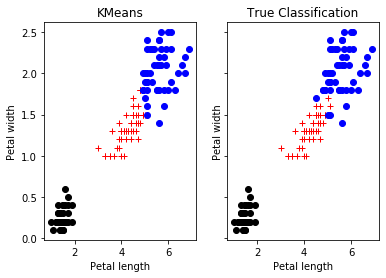

In [7]:
idx_0 = np.asarray(np.where(iris.target == 0)).reshape(50)
idx_1 = np.asarray(np.where(iris.target == 1)).reshape(50)
idx_2 = np.asarray(np.where(iris.target == 2)).reshape(50)

data_0 = iris.data[idx_0,:]
target_0 = iris.target[idx_0]

data_1 = iris.data[idx_1,:]
target_1 = iris.target[idx_1]

data_2 = iris.data[idx_2,:]
target_2 = iris.target[idx_2]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x[np.where(assignments[n-1] == 0),0], x[np.where(assignments[n-1] == 0),1],'ko')
ax1.plot(x[np.where(assignments[n-1] == 1),0], x[np.where(assignments[n-1] == 1),1],'r+')
ax1.plot(x[np.where(assignments[n-1] == 2),0], x[np.where(assignments[n-1] == 2),1],'bo')
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
ax1.set_title('KMeans')
ax2.plot(data_0[:,2],data_0[:,3],'ko',label="Versicolour")
ax2.plot(data_1[:,2],data_1[:,3],'r+',label="Versicolour")
ax2.plot(data_2[:,2],data_2[:,3],'bo',label="Virginica")
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')
ax2.set_title('True Classification')
plt.show()

In [8]:
#Compare to sklearn kmeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(x)
print("Cluster Centers (KMeans):")
print(kmeans.cluster_centers_)

Cluster Centers (KMeans):
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


## Effect of Outliers on KMeans

In [9]:
#add an outlier datapoint:
outlier = [[100,150]]
x_outlier = np.append(x,outlier,axis=0)

#re-run KMeans:
centroids_outlier = []
centroids_outlier.append(c0)
assignments_outlier = []

assignments_outlier, centroids_outlier = run_KMeans(x_outlier, c0, num_clusters)

#Note that KMeans created a cluster that just contains the outlier

number of iterations: 3
Cluster Centers:
[[  1.49215686   0.2627451 ]
 [  4.92525253   1.68181818]
 [100.         150.        ]]


## Complexity

The average complexity of KMeans is O(k*n*T*i), where n is the number of samples, k is the number of clusters, T is the time needed to calculate the euclidean distance between two samples (this is also a function of d, the dimension of the data), and i is the number of iterations of the KMeans algorithm